# 7.1.1. Learning Representations

LeNet이 Vision 분야에 새로운 가능성을 열어준 것은 맞지만, 큰 dataset에 대해서는 그다지 좋지 않은 성능을 보임. 

예를 들어, SVM(support vector machine)에도 뒤지는 neural network..

이전의 머신러닝 기법들은, feature를 'learn'하는게 아니라, 'craft'되어 들어갔음.

따라서, 더 큰 NN를 만들게 되었고, 그게 alexnet


In the case of an image, the lowest layers might come to detect edges, colors, and textures

Interestingly in the lowest layers of the network, the model learned feature extractors that resembled some traditional filters

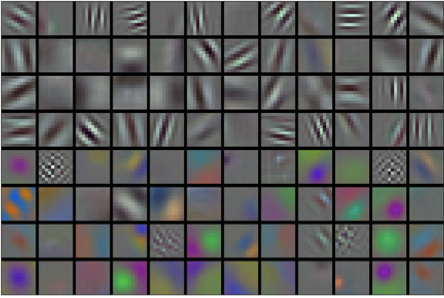

Deep models with many layers require large amounts of data in order to enter the regime where they significantly outperform traditional methods based on convex optimizations

# 7.1.2. AlexNet

Alexnet: 8-layer CNN.
Architectures of Alexnet and LeNet are very similar

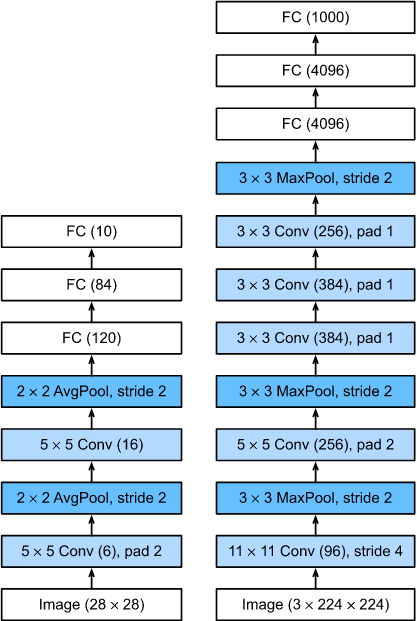

from Lenet(Left) to AlexNet(right)


Very similar but also different

1. AlexNet is much deeper
2. AlexNet used ReLU instead of Sigmoid.


## 7.1.2.1. Architecture

first layer, window shape: 11x11

second layer, window shape: 5x5, followed by 3x3

after the first, second, and fifth Convolution layers, MaxPooling added. (with window shape: 3x3, stride: 2)

## 7.1.2.3. Capacity Control and Preprocessing
AlexNet controls model complexity by DropOut

To augment the data even further, the training loop of AlexNet added a great deal of image augmentation, such as 'flipping', 'clipping', 'color changes'.

This effectively reduces Overfitting.

In [1]:
import torch 
from torch import nn
from d2l import torch as d2l

net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,padding=1,stride=4),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),

    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),

    nn.Linear(6400, 4096), nn.ReLU(), nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(p=0.5),

    nn.Linear(4096, 10))

# Test
X = torch.randn(1,1,224,224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

/Users/seyeon/Desktop/d2i_pytorch/d2i_env/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


## 7.1.3. Reading the Dataset

우리는 ImageNet이 아닌, Fashion-MNIST 예제를 사용할 것.

ImageNet으로 훈련하는 것은 시간 소요가 크기 때문.

문제는 Fashion-MNIST가 28x28로 낮은 resolution을 가지고 있는데, 이를 맞춰주는 과정이 필요하다. 즉, 28->224로 resize 해준다.

In [2]:
batch_size=128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

/Users/seyeon/Desktop/d2i_pytorch/d2i_env/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


# 7.1.4. Training

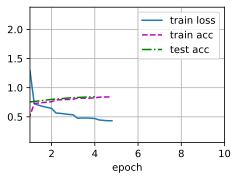

In [ ]:
lr, num_epochs=0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())